In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

In [4]:
X,y =make_classification(n_samples=5000, n_features=2, n_informative=2, n_classes=3, n_clusters_per_class=1,
                        n_redundant=0,n_repeated=0,weights=[0.01,0.05,0.94],class_sep=0.8,random_state=0)
print("Dados em cada uma das classes",sorted(Counter(y).items()))

Dados em cada uma das classes [(0, 64), (1, 262), (2, 4674)]


Podemos combinar duas técnicas de rebalanceamento de dados, a SMOTEENN e a SMOTETomek. Testamos ambas no nosso banco de dados e a primeira se mostrou mais robusta, limpando melhor os dados de ruídos.

Dados rebalanceados:  [(0, 4060), (1, 4381), (2, 3502)]
Score para o modelo SVM rebalanceado via SMOTEENN 0.9247257807920958


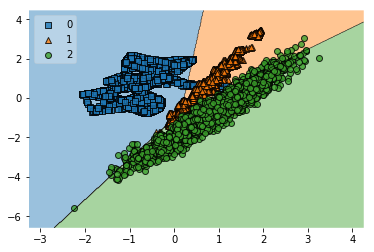

In [5]:
smote_enn=SMOTEENN(random_state=0)
X1,y1=smote_enn.fit_resample(X,y)
print("Dados rebalanceados: ",sorted(Counter(y1).items()))
svm1=LinearSVC(C=1,random_state=0).fit(X1,y1)
print("Score para o modelo SVM rebalanceado via SMOTEENN",svm1.score(X1,y1))
plot_decision_regions(X=X1,y=y1,clf=svm1,legend=2)

Dados rebalanceados via SMOTETomek:  [(0, 4499), (1, 4566), (2, 4413)]
Score para o modelo SVM rebalanceado via SMOTETomek 0.8604392343077608


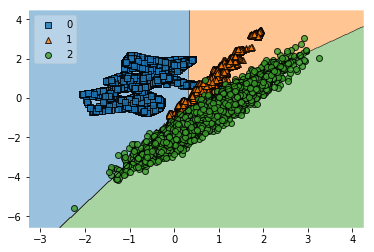

In [3]:
smote_tomek=SMOTETomek(random_state=0)
X2,y2=smote_tomek.fit_resample(X,y)
print("Dados rebalanceados via SMOTETomek: ",sorted(Counter(y2).items()))
svm2=LinearSVC(C=1,random_state=0).fit(X2,y2)
print("Score para o modelo SVM rebalanceado via SMOTETomek",svm2.score(X2,y2))
plot_decision_regions(X=X2,y=y2,clf=svm2,legend=2)